### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [530]:
data = pd.read_csv('data/coupons.csv')

In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [532]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [533]:
# Check for missing values
print(data.isnull().sum()) 


# Display option to show all rows and columns
#pd.set_option('display.max_rows', None) 
#pd.set_option('display.max_columns', None)

# Explore missing data values 
columns = ['car', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

#print(data[columns])




destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [534]:
# Car column describes the car type, this can be discarded as majority of them are missing
datawithoutcar = data.drop('car',axis=1)

# Check the car column is removed
print(datawithoutcar.shape[0])
datawithoutcar.columns

# Remove other nans
dataclean = datawithoutcar.dropna()

print("Clean data shape:", dataclean.shape[0])

# Check the percent dropped
print((data.shape[0]-dataclean.shape[0])/data.shape[0]*100) # 


12684
Clean data shape: 12079
4.769788710186061


**First Car column was dropped as majority of them are missing and other columns with nans were removed next.**

**Percent of missing data 4.769**



4. What proportion of the total observations chose to accept the coupon? 



In [535]:
# Get the count of accepted and not accepted coupons
coupon_counts = dataclean['Y'].value_counts()
print(coupon_counts, coupon_counts.sum())
print(coupon_counts/coupon_counts.sum())


Y
1    6877
0    5202
Name: count, dtype: int64 12079
Y
1    0.569335
0    0.430665
Name: count, dtype: float64


**About 56.93 percent accepted the coupon**


5. Use a bar plot to visualize the `coupon` column.

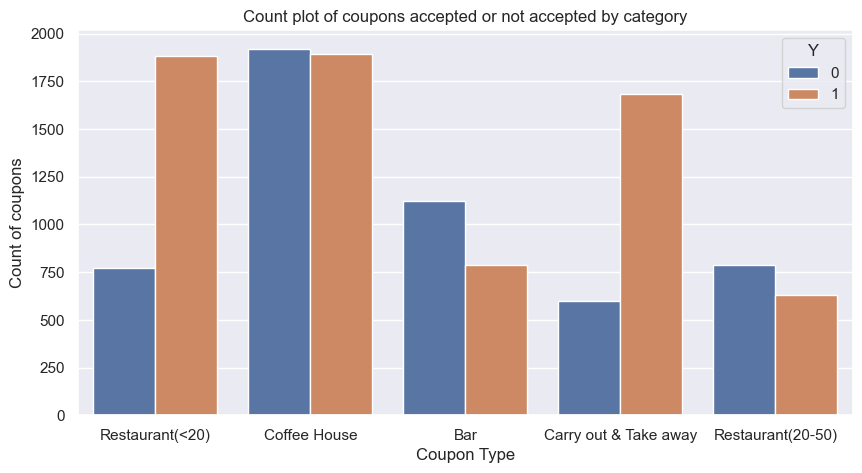

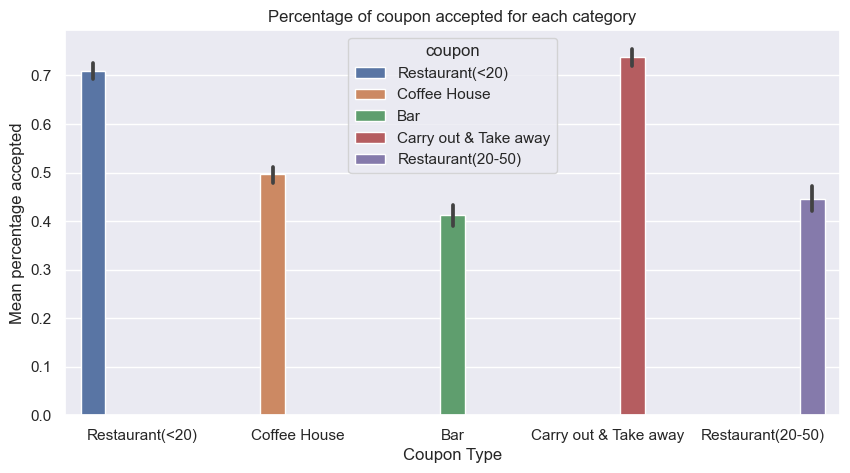

In [536]:
sns.set(rc={"figure.figsize":(10, 5)})
# Bar plot showing count of each coupon category, accepted and not accepted
fig1 = sns.countplot(data=dataclean, x='coupon', hue='Y')
fig1.set_xlabel('Coupon Type')
fig1.set_ylabel('Count of coupons')
fig1.set_title('Count plot of coupons accepted or not accepted by category')
plt.show()
fig1.figure.savefig('images/sns_count_plot1.png')

# Bar plot showing mean of accpeted coupons for each coupon category
fig2 = sns.barplot(data=dataclean, x='coupon', y='Y', hue='coupon')
fig2.set_xlabel('Coupon Type')
fig2.set_ylabel('Mean percentage accepted')
fig2.set_title('Percentage of coupon accepted for each category')
plt.show()
fig2.figure.savefig('images/sns_count_plot2.png')

#print(dataclean['coupon'].value_counts(), dataclean['coupon'].value_counts().sum())
#print(dataclean.groupby('coupon')[['Y']].count())
#print(dataclean.query("coupon == 'Bar' & Y==1").count())



6. Use a histogram to visualize the temperature column.

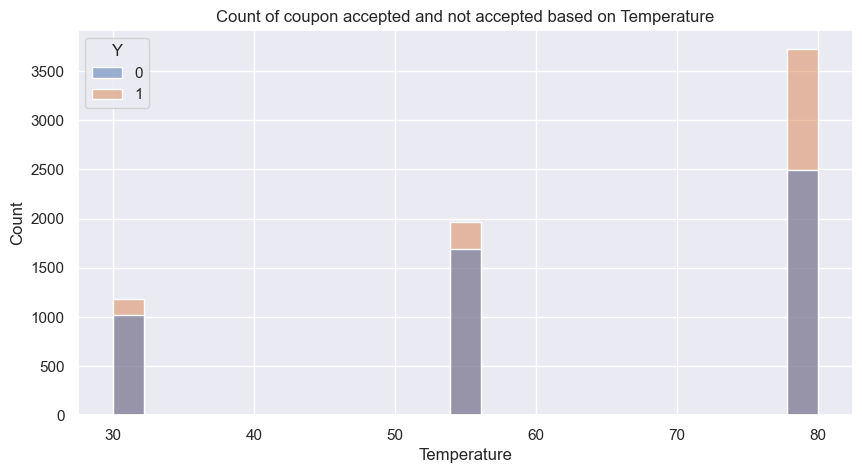

In [537]:
fig3 = sns.histplot(data=dataclean, x='temperature', hue='Y')
fig3.set_title('Count of coupon accepted and not accepted based on Temperature')
fig3.set_xlabel('Temperature')
plt.show()
fig3.figure.savefig('images/sns_hist_plot3.png')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [538]:
# Filter coupon by Bar
bardata = dataclean[dataclean['coupon']=='Bar']
print(bardata.sample(10))

          destination  passanger weather  temperature  time coupon expiration  \
4742  No Urgent Place      Alone   Sunny           80  10AM    Bar         1d   
738              Work      Alone   Sunny           55   7AM    Bar         1d   
1047             Home      Alone   Sunny           55   6PM    Bar         1d   
3714  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1668             Home      Alone   Sunny           55   6PM    Bar         1d   
3439             Home      Alone   Sunny           55   6PM    Bar         1d   
2813             Home      Alone   Sunny           55   6PM    Bar         1d   
3399             Work      Alone   Sunny           55   7AM    Bar         1d   
5005  No Urgent Place      Alone   Sunny           80  10AM    Bar         1d   
101              Home      Alone   Sunny           55   6PM    Bar         1d   

      gender      age      maritalStatus  has_children  \
4742  Female   50plus             Single          

2. What proportion of bar coupons were accepted?


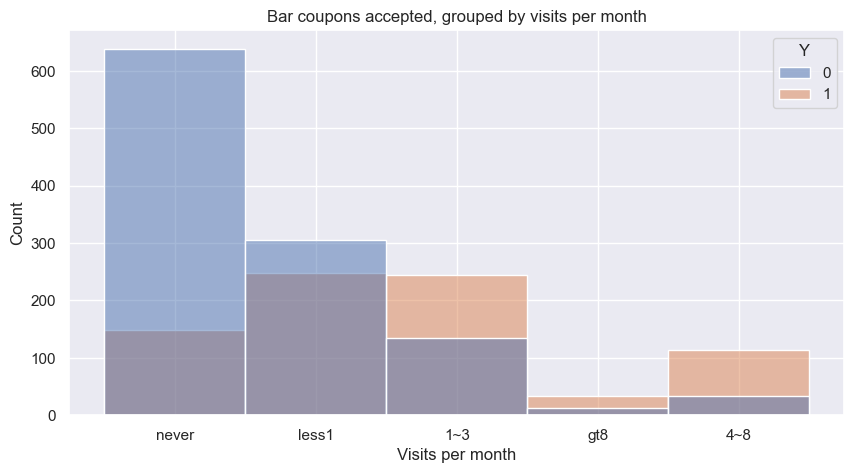

coupon
Bar    0.411918
Name: Y, dtype: float64


In [539]:
sns.set(rc={"figure.figsize":(10, 5)})
fig21 = sns.histplot(data=bardata, x='Bar', hue='Y')
fig21.set_title('Bar coupons accepted, grouped by visits per month')
fig21.set_xlabel('Visits per month')
plt.show()
fig21.figure.savefig('images/sns_hist_plot21.png')

#print(bardata.groupby('Bar')['Y'].mean())

# Print the proportions of bar coupon that were
print(bardata.groupby('coupon')['Y'].mean())

**About 41.19% accepted the Bar coupons**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [540]:
# Acceptance for those went to bar 3 or fewer times
print(bardata.groupby('Bar')[['Y']].mean())
accepted_three_or_fewer = bardata.query('Y == 1 & Bar in ["less1","1~3", "never"]')['Y'].count()
not_accepted_three_or_fewer = bardata.query('Y == 0 & Bar in ["less1","1~3", "never"]')['Y'].count()
acceptance_rate_three_or_fewer = accepted_three_or_fewer/ (accepted_three_or_fewer + not_accepted_three_or_fewer) *100
print("accepted_three_or_fewer:", accepted_three_or_fewer)
print("not_accepted_three_or_fewer:", not_accepted_three_or_fewer)
print("acceptance_rate_three_or_fewer:", acceptance_rate_three_or_fewer)

# Acceptance for those went to bar more than 3 times
accepted_more_than_three = bardata.query('Y == 1 & Bar in ["4~8","gt8"]')['Y'].count()
not_accepted_more_than_three = bardata.query('Y == 0 & Bar in ["4~8","gt8"]')['Y'].count()
acceptance_rate_more_than_three = accepted_more_than_three/(accepted_more_than_three + not_accepted_more_than_three) * 100
print("accepted_more_than_three:", accepted_more_than_three)
print("not_accepted_more_than_three:", not_accepted_more_than_three)
print("acceptance_rate_more_than_three:", acceptance_rate_more_than_three)

sum = accepted_three_or_fewer + not_accepted_three_or_fewer + accepted_more_than_three + not_accepted_more_than_three

print(sum)

              Y
Bar            
1~3    0.646438
4~8    0.775510
gt8    0.717391
less1  0.446655
never  0.189086
accepted_three_or_fewer: 641
not_accepted_three_or_fewer: 1079
acceptance_rate_three_or_fewer: 37.26744186046512
accepted_more_than_three: 147
not_accepted_more_than_three: 46
acceptance_rate_more_than_three: 76.16580310880829
1913


**Acceptance rate who went to bar three or fewer times a month = 37.26**

**Acceptance rate who went to bar more than three times a month = 76.16**

Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?4. 


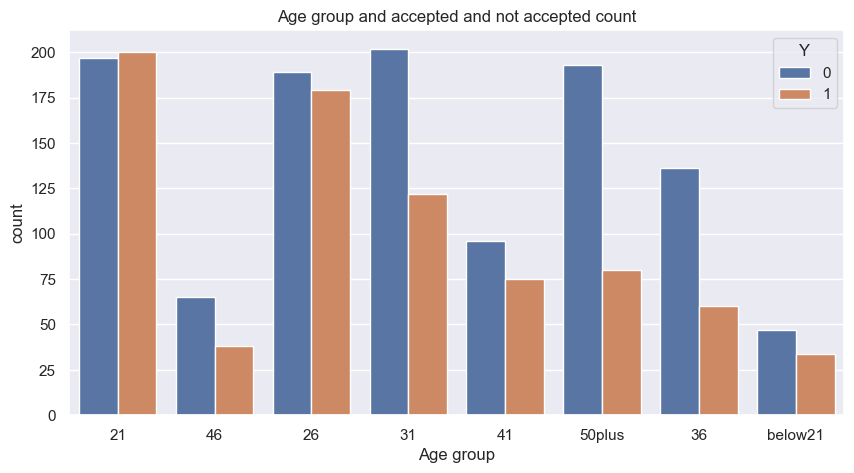

accepted_age_25_and_over: 278 
not_accepted_age_25_and_over: 125 
rate_of_accpetance_age_25_and_over: 68.98263027295285
accepted_age_25_under: 114 
not_accepted_age_25_under: 55 
rate_of_accepted_age_25_under: 67.45562130177515


In [541]:
# Visualise bar data accepted and not accepted by number of visits per month by age
sns.set(rc={"figure.figsize":(10, 5)})
fig23 = sns.countplot(data=bardata, x='age', hue= 'Y')
fig23.set_title('Age group and accepted and not accepted count')
fig23.set_xlabel('Age group')
plt.show()
fig23.figure.savefig('images/sns_count_plot23.png')

# drivers who go to a bar more than once a month and are over the age of 25
accepted_age_25_and_over = bardata.query('Y == 1 & Bar in ["1~3", "4~8", "gt8"] & age in ["26","31","36","41","46","50plus"]')['Y'].count()
not_accepted_age_25_and_over = bardata.query('Y == 0 & Bar in ["1~3", "4~8", "gt8"] & age in ["26","31","36","41","46","50plus"]')['Y'].count()
rate_of_accpetance_age_25_and_over = accepted_age_25_and_over/(accepted_age_25_and_over + not_accepted_age_25_and_over) * 100

print("accepted_age_25_and_over:" ,accepted_age_25_and_over, "\nnot_accepted_age_25_and_over:", not_accepted_age_25_and_over, "\nrate_of_accpetance_age_25_and_over:", rate_of_accpetance_age_25_and_over)

# drivers who go to a bar more than once a month and are under the age of 25
accepted_age_25_under= bardata.query('Y == 1 & Bar in ["1~3", "4~8", "gt8"] & age in ["21","below21"]')['Y'].count()
not_accepted_age_25_under = bardata.query('Y == 0 & Bar in ["1~3", "4~8", "gt8"] & age in ["21","below21"]')['Y'].count()
rate_of_accepted_age_25_under = accepted_age_25_under/(accepted_age_25_under + not_accepted_age_25_under) * 100

print("accepted_age_25_under:" ,accepted_age_25_under, "\nnot_accepted_age_25_under:", not_accepted_age_25_under, "\nrate_of_accepted_age_25_under:", rate_of_accepted_age_25_under)


**Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 = 68.98**

**Acceptance rate of drivers who go to a bar more than once a month and are under the age of 25 = 67.45**

**There is slight difference, with people over the age of 25 going more**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


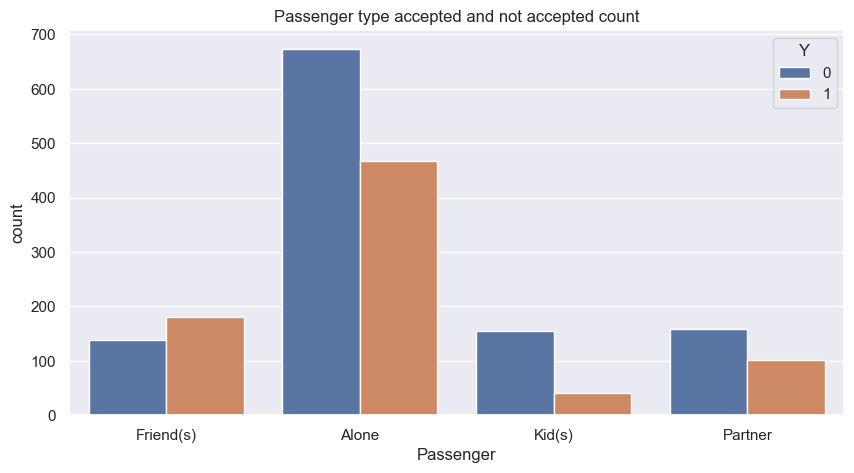

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']
accepted_no_kid: 376 
not_accepted_no_kid: 154 
rate_of_acceptance_no_kid: 70.94339622641509


In [542]:

# Visualise bar data accepted and not accepted by passenger
sns.set(rc={"figure.figsize":(10, 5)})
fig25 = sns.countplot(data=bardata, x='passanger', hue= 'Y')
fig25.set_title('Passenger type accepted and not accepted count')
fig25.set_xlabel('Passenger')
plt.show()
fig25.figure.savefig('images/sns_count_plot25.png')

print(bardata['passanger'].unique())
print(bardata['occupation'].unique())

#drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
accepted_no_kid = bardata.query('Y == 1 & Bar in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].count()
not_accepted_no_kid = bardata.query('Y == 0 & Bar in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].count()
rate_of_acceptance_no_kid = accepted_no_kid/(accepted_no_kid+not_accepted_no_kid) * 100
print("accepted_no_kid:", accepted_no_kid, "\nnot_accepted_no_kid:", not_accepted_no_kid, "\nrate_of_acceptance_no_kid:", rate_of_acceptance_no_kid)


**Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 70.94**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



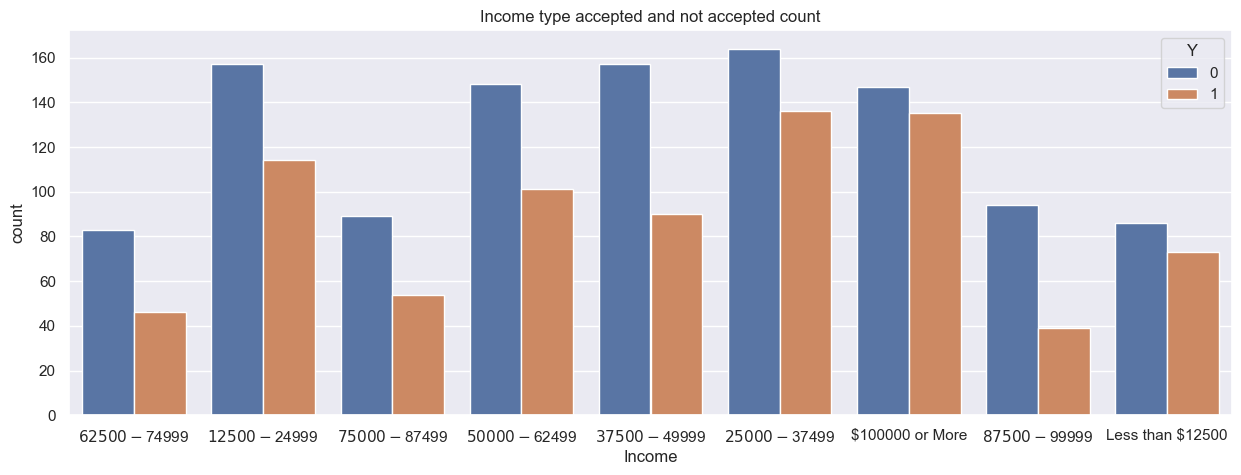

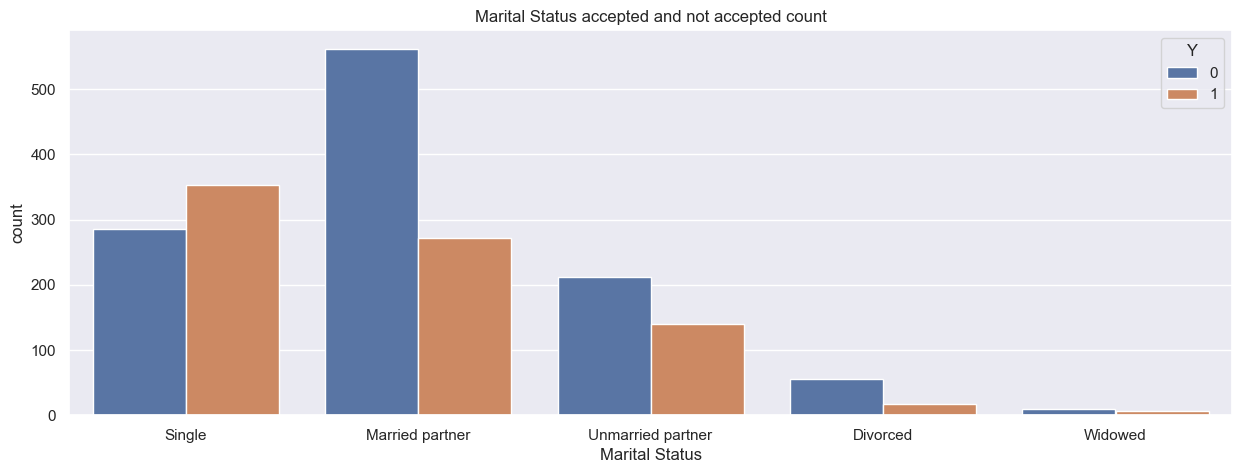

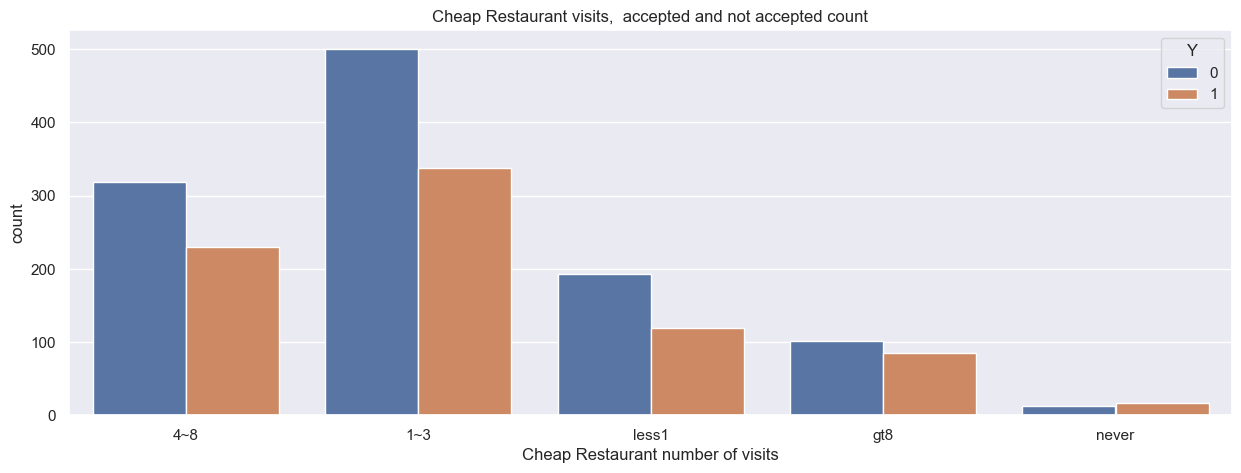

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
accepted: 438 not_accepted  308  rate_of_acceptance 58.71313672922251


In [543]:

# Visualise income type accepted and not accepted
sns.set(rc={"figure.figsize":(15, 5)})
fig261 = sns.countplot(data=bardata, x='income', hue= 'Y')
fig261.set_title('Income type accepted and not accepted count')
fig261.set_xlabel('Income')
plt.show()
fig261.figure.savefig('images/sns_count_plot261.png')

# Visualise marital status and acceptance rate
sns.set(rc={"figure.figsize":(15, 5)})
fig262 = sns.countplot(data=bardata, x='maritalStatus', hue= 'Y')
fig262.set_title('Marital Status accepted and not accepted count')
fig262.set_xlabel('Marital Status')
plt.show()
fig261.figure.savefig('images/sns_count_plot261.png')

# Visualise by vists to cheap restaurants
sns.set(rc={"figure.figsize":(15, 5)})
fig263 = sns.countplot(data=bardata, x='RestaurantLessThan20', hue= 'Y')
fig263.set_title('Cheap Restaurant visits,  accepted and not accepted count')
fig263.set_xlabel('Cheap Restaurant number of visits')
plt.show()
fig261.figure.savefig('images/sns_count_plot261.png')

# Check the unique column values
print(bardata['maritalStatus'].unique())
print(bardata['RestaurantLessThan20'].unique())
print(bardata['income'].unique())

# Create query filters based on given conditions
rule1 = 'Bar in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & maritalStatus ! = "Widowed"'
rule2 = 'Bar in ["1~3", "4~8", "gt8"] & age in ["21","below21", "26"]'
rule3 = 'RestaurantLessThan20 in ["4~8", "gt8"] & income in ["$12500 - $24999", "$37500 - $49999", "$25000 - $37499", "Less than $12500"]'

# Apply the query rules
accepted = bardata.query(f'Y == 1 & ({rule1}  | {rule2} | {rule3})')['Y'].count()
not_accepted = bardata.query(f'Y == 0 & ({rule1}  | {rule2} | {rule3})')['Y'].count()
rate_of_acceptance = accepted/(accepted + not_accepted) *100
print("accepted:", accepted , "not_accepted ", not_accepted, " rate_of_acceptance", rate_of_acceptance)

#print("accepted:\n", accepted[['age','Bar','passanger','RestaurantLessThan20', 'income','Y']]) #,'passanger','Bar','RestaurantLessThan20', 'income','Y'])

 **For the given rules the rate of acceptance is 58.7**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**We can hypothesize**

**Acceptance rate for who went to bar more than three times a month is high**

**Acceptance rate higher for driver who went to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry**

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### For this excersise Coffee House data will be explored with similar process as the Bar data
## Using the cleaned data extract data for Coffee House

In [544]:
# Filter the Coffee House coupon data
coffehousedata = dataclean[dataclean['coupon']=='Coffee House']
#print(coffehousedata)
print(coffehousedata.sample(10))


           destination  passanger weather  temperature  time        coupon  \
3738   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4452              Work      Alone   Sunny           80   7AM  Coffee House   
10209  No Urgent Place      Alone   Rainy           55  10AM  Coffee House   
524    No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
2198              Home      Alone   Sunny           80   6PM  Coffee House   
5646              Work      Alone   Sunny           80   7AM  Coffee House   
1050              Work      Alone   Sunny           55   7AM  Coffee House   
3030   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
10256  No Urgent Place     Kid(s)   Sunny           80  10AM  Coffee House   
3608   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   

      expiration  gender      age      maritalStatus  has_children  \
3738          1d  Female       26  Unmarried partner             0   
4

## What proportions of Coffee Data were Accepted?

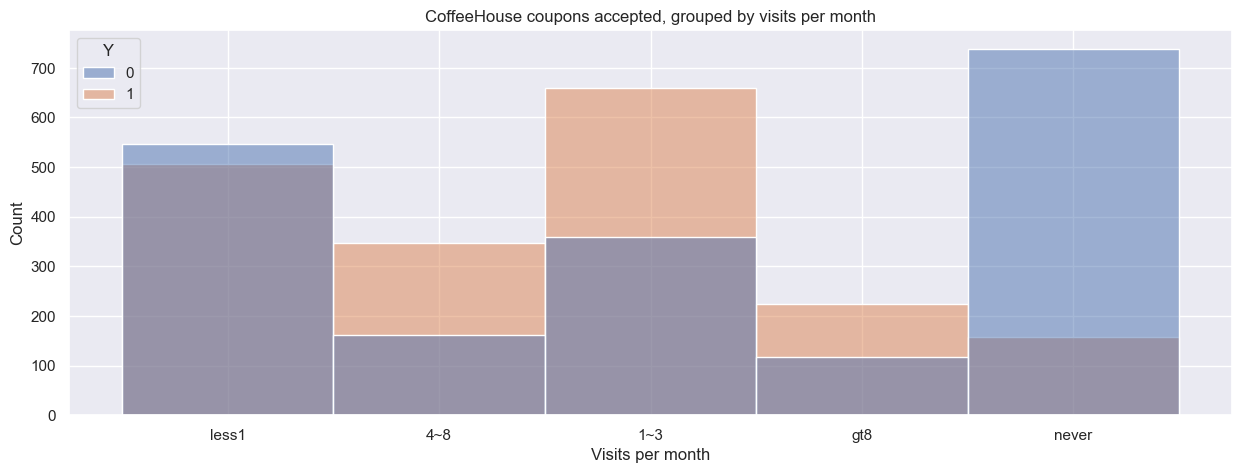

coupon
Bar    0.411918
Name: Y, dtype: float64


In [545]:
# Visualise Coffee house data for coupon accepted not accepted
# sns.set(rc={"figure.figsize":(10, 5)})
fig31 = sns.histplot(data=coffehousedata, x='CoffeeHouse', hue='Y')
fig31.set_title('CoffeeHouse coupons accepted, grouped by visits per month')
fig31.set_xlabel('Visits per month')
plt.show()
fig31.figure.savefig('images/sns_hist_plot31.png')

# Print the proportions of coffeehouse  coupon that were accepted
print(bardata.groupby('coupon')['Y'].mean())

**About 41.19 percent of people accepted Coffee house coupons**



## Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.


In [546]:
# Acceptance rate for those who went to a coffee house 3 or fewer times
accepted_three_or_fewer = coffehousedata.query('Y == 1 & CoffeeHouse in ["less1","1~3", "never"]')['Y'].count()
not_accepted_three_or_fewer = coffehousedata.query('Y == 0 & CoffeeHouse in ["less1","1~3", "never"]')['Y'].count()
acceptance_rate_three_or_fewer = accepted_three_or_fewer/ (accepted_three_or_fewer + not_accepted_three_or_fewer) *100
print("accepted_three_or_fewer:", accepted_three_or_fewer)
print("not_accepted_three_or_fewer:", not_accepted_three_or_fewer)
print("acceptance_rate_three_or_fewer:", acceptance_rate_three_or_fewer)

# Acceptance rate for those who went to a coffee house more than 3 times
accepted_more_than_three = coffehousedata.query('Y == 1 & CoffeeHouse in ["4~8","gt8"]')['Y'].count()
not_accepted_more_than_three = coffehousedata.query('Y == 0 & CoffeeHouse in ["4~8","gt8"]')['Y'].count()
acceptance_rate_more_than_three = accepted_more_than_three/(accepted_more_than_three + not_accepted_more_than_three) * 100
print("accepted_more_than_three",accepted_more_than_three)
print("not_accepted_more_than_three", not_accepted_more_than_three)
print("acceptance_rate_more_than_three", acceptance_rate_more_than_three)

#sum = accepted_three_or_fewer + not_accepted_three_or_fewer + accepted_more_than_three + not_accepted_more_than_three
#print(sum)


accepted_three_or_fewer: 1323
not_accepted_three_or_fewer: 1644
acceptance_rate_three_or_fewer: 44.590495449949444
accepted_more_than_three 571
not_accepted_more_than_three 278
acceptance_rate_more_than_three 67.25559481743227


**Acceptance rate for those who went to a coffee house 3 or fewer times = 44.590**

**Acceptance rate for those who went to a coffee house more than 3 times = 67.25**

## Compare the acceptance rate between drivers who go to a Coffehouse more than once a month and are over the age of 25 to the all others.  Is there a difference?

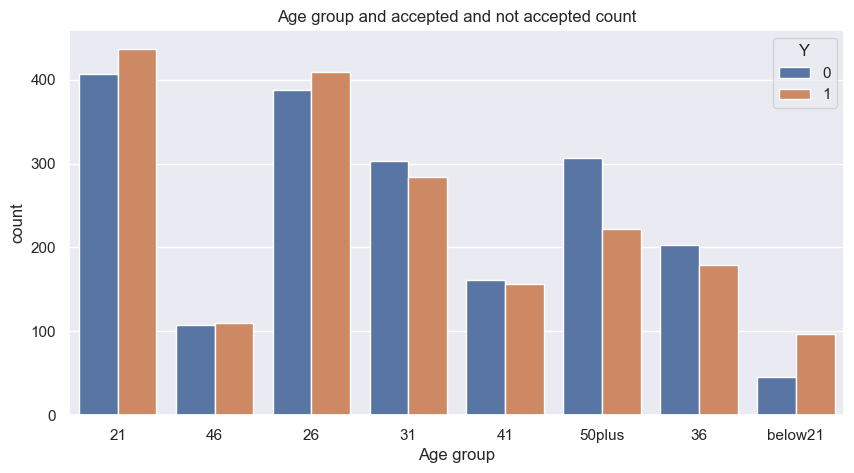

accepted_age_25_and_over: 857 
not_accepted_age_25_and_over: 483 
rate_of_accpetance_age_25_and_over: 63.95522388059701
accepted_age_25_under: 374 
not_accepted_age_25_under: 154 
rate_of_accepted_age_25_under: 70.83333333333334


In [547]:
# Visualise coffehouse data accepted and not accepted by number of visits per month by age
sns.set(rc={"figure.figsize":(10, 5)})
fig23 = sns.countplot(data=coffehousedata, x='age', hue= 'Y')
fig23.set_title('Age group and accepted and not accepted count')
fig23.set_xlabel('Age group')
plt.show()
fig23.figure.savefig('images/sns_count_plot33.png')

# drivers who go to a coffehouse more than once a month and are over the age of 25
accepted_age_25_and_over = coffehousedata.query('Y == 1 & CoffeeHouse in ["1~3", "4~8", "gt8"] & age in ["26","31","36","41","46","50plus"]')['Y'].count()
not_accepted_age_25_and_over = coffehousedata.query('Y == 0 & CoffeeHouse in ["1~3", "4~8", "gt8"] & age in ["26","31","36","41","46","50plus"]')['Y'].count()
rate_of_accpetance_age_25_and_over = accepted_age_25_and_over/(accepted_age_25_and_over + not_accepted_age_25_and_over) * 100

print("accepted_age_25_and_over:" ,accepted_age_25_and_over, "\nnot_accepted_age_25_and_over:", not_accepted_age_25_and_over, "\nrate_of_accpetance_age_25_and_over:", rate_of_accpetance_age_25_and_over)

# drivers who go to a coffehouse more than once a month and are under the age of 25
accepted_age_25_under= coffehousedata.query('Y == 1 & CoffeeHouse in ["1~3", "4~8", "gt8"] & age in ["21","below21"]')['Y'].count()
not_accepted_age_25_under = coffehousedata.query('Y == 0 & CoffeeHouse in ["1~3", "4~8", "gt8"] & age in ["21","below21"]')['Y'].count()
rate_of_accepted_age_25_under = accepted_age_25_under/(accepted_age_25_under + not_accepted_age_25_under) * 100

print("accepted_age_25_under:" ,accepted_age_25_under, "\nnot_accepted_age_25_under:", not_accepted_age_25_under, "\nrate_of_accepted_age_25_under:", rate_of_accepted_age_25_under)


**Acceptance rate of drivers who go to a coffehouse more than once a month and are over the age of 25 : 63.95 percent**

**Acceptance rate of drivers who go to a coffeehouse more than once a month and are under the age of 25: 70.83 percent**

## Use the same process to compare the acceptance rate between drivers who go to coffeehouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


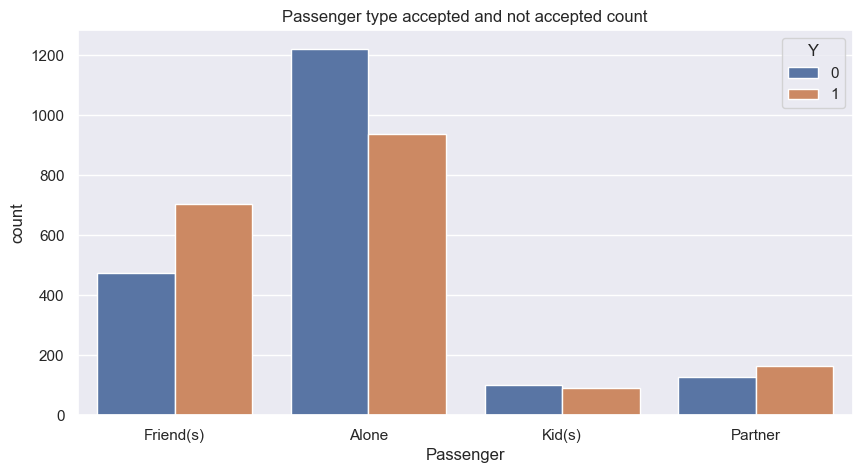

accepted_no_kid: 1163 
not_accepted_no_kid: 600 
rate_of_acceptance_no_kid: 65.96710153148044


In [548]:
# Visualise coffehousedata data accepted and not accepted by passenger
sns.set(rc={"figure.figsize":(10, 5)})
fig35 = sns.countplot(data=coffehousedata, x='passanger', hue= 'Y')
fig35.set_title('Passenger type accepted and not accepted count')
fig35.set_xlabel('Passenger')
plt.show()
fig25.figure.savefig('images/sns_count_plot35.png')

#drivers who go to coffeehouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
accepted_no_kid = coffehousedata.query('Y == 1 & CoffeeHouse in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].count()
not_accepted_no_kid = coffehousedata.query('Y == 0 & CoffeeHouse in ["1~3", "4~8", "gt8"] & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')['Y'].count()
rate_of_acceptance_no_kid = accepted_no_kid/(accepted_no_kid+not_accepted_no_kid) * 100
print("accepted_no_kid:", accepted_no_kid, "\nnot_accepted_no_kid:", not_accepted_no_kid, "\nrate_of_acceptance_no_kid:", rate_of_acceptance_no_kid)

**Acceptance rate of drivers who go to coffeehouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 65.96 percent**

## Hypothesisation for Coffeehouse data:
**About 41.19 Percent of drivers in general accept the coupons**

**acceptance rate for those who went to a coffee house more than 3 times is higher at 67.25 compared to who went less than 3 times.**

**Acceptance rate of higher for drivers age under 25 at 70.83 % compared to age over 25 at 63.95%**